# Regularized logisitic regression

**Import third-party libraries and modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from plotData import plotData
from mapFeature import mapFeature
from costFunctionReg import costFunctionReg
from gradient import gradient
from plotDecisionBoundary import plotDecisionBoundary
from predict import predict

In this part of the exericise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## 1. Visualizing the data
### Load data
First of all, we have to load data set from **ex2data2.txt** file into two variables:

* X: training data
* y: labels

In [2]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

m = len(y)

y = y.reshape((m, 1))

**plotData** function is used to generate a figure like Figure 1, where the axes the two test scores, and the positive ($y = 1$, accepted) and negative ($y = 0$, rejected) examples are shown with different makers.

Text(0.5, 1.0, 'Figure1: Plot of training data')

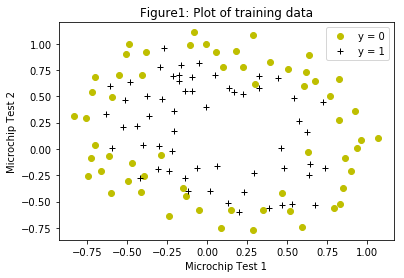

In [3]:
plotData(X, y)
    
# Put some lables and legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 0', 'y = 1'])
plt.title('Figure1: Plot of training data')

Figure 1 shows that our dataset cannot be separated into positive and negative examples by straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find linear decision boundary.

## 2. Feature mapping
One way to fit the data better is to create more feature from each data point. We will map the features into all polynomial terms of $x_{1} and x_{2}$ up to the sixth power.

$$
mapFeature(x) = 
\begin{bmatrix}
1 \\
x_{1} \\
x_{2} \\
x_{1}^{2} \\
x_{1}x_{2} \\
x_{2}^{2} \\
x_{1}^{3} \\
\vdots \\
x_{1}x_{2}^{5} \\
x_{2}^{6}
\end{bmatrix}
$$

As result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

while the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts, we will implement regularized logistic regression to fit the data and also see for ourselve how regularization can help combat the overfitting problem.

In [4]:
## ================================== Part 1: Regularized Logistic Regression ===========================
# In this part, you are given a dataset with data points that are not
# linearly separable. However, you would still like to use logistic
# regression to classify the data points.
#
# To do so, you introduce more features to use -- in particular, you add
# polynomial features to our data matrix (similar to polynomial regession).

# Add polynomial Features


# Note that mapFeature also adds a columnn of ones for us, so the intercept
# term is handled
X_0 = np.reshape(X[:, 0], (m, 1))
X_1 = np.reshape(X[:, 1], (m, 1))

X = mapFeature(X_0, X_1)
print(X)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


### 3. Cost function and gradient
Now, we will implement code to compute the cost function and gradient for regularized logistic regression. The code in **costFunctionReg** function will return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}
$$

Note that, we should not regularize the parameter $\theta_{0}$.

And the gradient of the cost function is a vector there the $j^{th}$ element is defined as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)x_{j}^{(i)}; \big(j = 0\big)
$$

$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \Big(\frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}) - y^{(i)}\big)x_{j}^{(i)}\Big) + \frac{\lambda}{m}\theta_{j}; \big(j\ge1\big)
$$

Once we are done, the notebook will call our **costFunctionReg** function using the inital value of $\theta$ (initialized to all zeros). We should that the cost is about 0.693 (with $\lambda = 1$)

In [5]:
# Init fitting params
init_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lam_bda = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionReg(init_theta, X, y, lam_bda)
grad = gradient(init_theta, X, y, lam_bda)

print('Cost at initial theta (zeros): %f\n' % (cost))
print('Exptected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print('0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0.693147

Exptected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients (approx) - first five values only:

0.0085
 0.0188
 0.0001
 0.0503
 0.0115



With $\lambda = 10$ the cost is about 3.16

In [6]:
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1], 1))
lambda_ = 10
cost = costFunctionReg(test_theta, X, y, lambda_)
grad = gradient(test_theta, X, y, lambda_)

print('Cost at test theta (with lambda = 10): %f\n' % (cost))
print('Exptected cost (approx): 3.16\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print('0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 3.164509

Exptected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:

[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
Expected gradients (approx) - first five values only:

0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### 4. Learning parameters using ***minimize*** function
We still use **minimize** function to learn the optimal parameters $\theta$.

In [7]:
## ================================ Part 2: Regularization and Accuracies ================================
# Optional Exericse
# In this part, you will get to try different values of lambda and
# see how regularization affects the decsion coundart
#
# Try the following values of lambda (0, 1, 10, 100).
#
# How does the decision boundary change when you vary lambda ? How does
# the training set accuracy vary ?

# Initialize fitting parameters
init_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
lam_bda = 1

# Set options
options = {'maxiter': 400}

# Optimize
result = opt.minimize(costFunctionReg, init_theta, (X, y, lam_bda), method='TNC', jac=False, options=options)

# Get theta
theta = result.x.reshape((len(result.x), 1))
print('Optimal theta: \n\n{}'.format(theta))

Optimal theta: 

[[ 1.25063024]
 [ 0.64889013]
 [ 1.21515839]
 [-1.95868195]
 [-0.92379918]
 [-1.41750791]
 [-0.01317342]
 [-0.40366236]
 [-0.29140672]
 [-0.20798786]
 [-1.46088563]
 [-0.07518902]
 [-0.61003648]
 [-0.25615103]
 [-1.15711495]
 [-0.2205003 ]
 [-0.17616631]
 [-0.04359757]
 [-0.28748842]
 [-0.37090162]
 [-0.54151695]
 [-1.03518502]
 [ 0.05939314]
 [-0.24457624]
 [ 0.0277008 ]
 [-0.25239175]
 [-0.19075156]
 [-0.92616029]]


## 5. Plotting the decision boundary
We will visualize the model learned by this classifier. In the **plotDecisionBoundary** function, we plot the non-linear decision boundary by computing the classifier's predictions on evenly spaced  grid and then drew a contour plot of where the predictions change form $y = 0$ to $y = 1$

After learning the parameters $\theta$, the next step we will plot a decision boundary similar to Figure 2.

Text(0.5, 1.0, 'Figure 2: Training data with decision boundary ($\\lambda = 1$)')

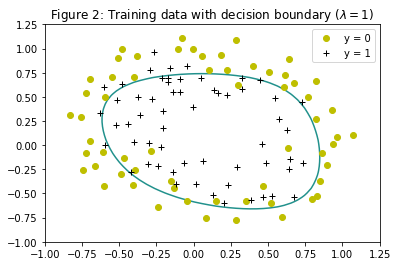

In [8]:
# Plot boundary
plotDecisionBoundary(theta, X, y)

# Legend, specific for the exercise
plt.legend(['y = 0', 'y = 1', 'Decision Boundary'])
plt.title('Figure 2: Training data with decision boundary ($\lambda = 1$)')

Accuracy on training set ($\lambda = 1$)

In [9]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train accuracy: %f\n' % (np.mean(np.double(p == y)) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

Train accuracy: 83.050847

Expected accuracy (with lambda = 1): 83.1 (approx)



We will test with a another lambda values to see its effect to our model:

* $\lambda = 100$

Text(0.5, 1.0, 'Figure 3: Too much regularization (Underfitting) ($\\lambda = 100$)')

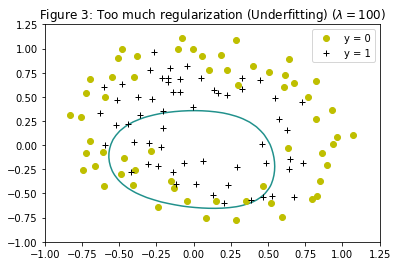

In [10]:
init_theta = np.zeros((X.shape[1], 1))
lam_bda = 100
options = {'maxiter': 400}
result = opt.minimize(costFunctionReg, init_theta, (X, y, lam_bda), method='TNC', jac=False, options=options)
theta = result.x.reshape((len(result.x), 1))
plotDecisionBoundary(theta, X, y)
plt.legend(['y = 0', 'y = 1', 'Decision Boundary'])
plt.title('Figure 3: Too much regularization (Underfitting) ($\lambda = 100$)')

Accuracy on training set ($\lambda = 100$)

In [11]:
# Compute accuracy on our training set
p = predict(theta, X)

print('Train accuracy: %f\n' % (np.mean(np.double(p == y)) * 100))

Train accuracy: 63.559322

